# Cryptocurrency Portfolio Dashboard app
Une application connectée pour suivre son portefeuille de cryptomonnaies et faire des simulations.  
*Source des données : coinmarketcap.com*

### Importation des modules requis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
from datetime import date, datetime, timedelta

### Liste des cryptomonnaies prises en charge

In [2]:
%%capture
# Téléchargement de la liste
!scrapy crawl listingspider -O rawdata/listing.csv

In [3]:
listing = pd.read_csv("rawdata/listing.csv")
for i in range(len(listing)):
    sys.stdout.write(f"{listing.loc[i, 'name']} ({listing.loc[i, 'symbol']})")
    if i%5 != 4:
        sys.stdout.write(" | ")
    else:
        sys.stdout.write("\n");

Bitcoin (BTC) | Ethereum (ETH) | Tether (USDT) | BNB (BNB) | USD Coin (USDC)
XRP (XRP) | Cardano (ADA) | Polygon (MATIC) | Dogecoin (DOGE) | Solana (SOL)
Binance USD (BUSD) | Polkadot (DOT) | Litecoin (LTC) | Shiba Inu (SHIB) | TRON (TRX)
Avalanche (AVAX) | Dai (DAI) | Wrapped Bitcoin (WBTC) | Chainlink (LINK) | UNUS SED LEO (LEO)
Cosmos (ATOM) | Ethereum Classic (ETC) | Monero (XMR) | Uniswap (UNI) | Stellar (XLM)
OKB (OKB) | Toncoin (TON) | Bitcoin Cash (BCH) | Filecoin (FIL) | Lido DAO (LDO)
Aptos (APT) | TrueUSD (TUSD) | Hedera (HBAR) | Cronos (CRO) | NEAR Protocol (NEAR)
VeChain (VET) | Arbitrum (ARB) | ApeCoin (APE) | Internet Computer (ICP) | Algorand (ALGO)
Quant (QNT) | Stacks (STX) | The Graph (GRT) | Fantom (FTM) | EOS (EOS)
BitDAO (BIT) | Decentraland (MANA) | MultiversX (EGLD) | Tezos (XTZ) | Theta Network (THETA)
Aave (AAVE) | Conflux (CFX) | Flow (FLOW) | Immutable (IMX) | Axie Infinity (AXS)
The Sandbox (SAND) | Neo (NEO) | Rocket Pool (RPL) | Pax Dollar (USDP) | KuCoin

### Visualiser l'évolution du cours d'une cryptomonnaie

Entrer ci-dessous le symbole de la cryptomonnaie à visualiser, ainsi que les dates de début et de fin du graphe :

In [11]:
symbole = "BTC"
date_debut = "2023-01-01" # format AAAA-MM-JJ
#date_fin = "2023-03-01" # format AAAA-MM-JJ
date_fin = str(date.today() - timedelta(days = 1)) # jusqu'à hier

In [12]:
%%capture
# Téléchargement des données de cours
!scrapy crawl pricespider -a cid={listing.loc[np.where(listing["symbol"] == symbole)[0][0], "id"]} -a date={str(date.today())} -O rawdata/{symbole}.csv

2023-03-29 10:13:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://web-api.coinmarketcap.com/v2/cryptocurrency/ohlcv/historical?id=1&convert=EUR&time_start=2013-04-28&time_end=2023-03-29>

{'time': '2018-11-14', 'price': 5072.282636866253}
2023-03-29 10:13:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://web-api.coinmarketcap.com/v2/cryptocurrency/ohlcv/historical?id=1&convert=EUR&time_start=2013-04-28&time_end=2023-03-29>

{'time': '2018-11-15', 'price': 4987.667937423697}
2023-03-29 10:13:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://web-api.coinmarketcap.com/v2/cryptocurrency/ohlcv/historical?id=1&convert=EUR&time_start=2013-04-28&time_end=2023-03-29>

{'time': '2018-11-16', 'price': 4882.035226690919}
2023-03-29 10:13:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://web-api.coinmarketcap.com/v2/cryptocurrency/ohlcv/historical?id=1&convert=EUR&time_start=2013-04-28&time_end=2023-03-29>

{'time': '2018-11-17', 'price': 4864.482385995816}
2023-03-

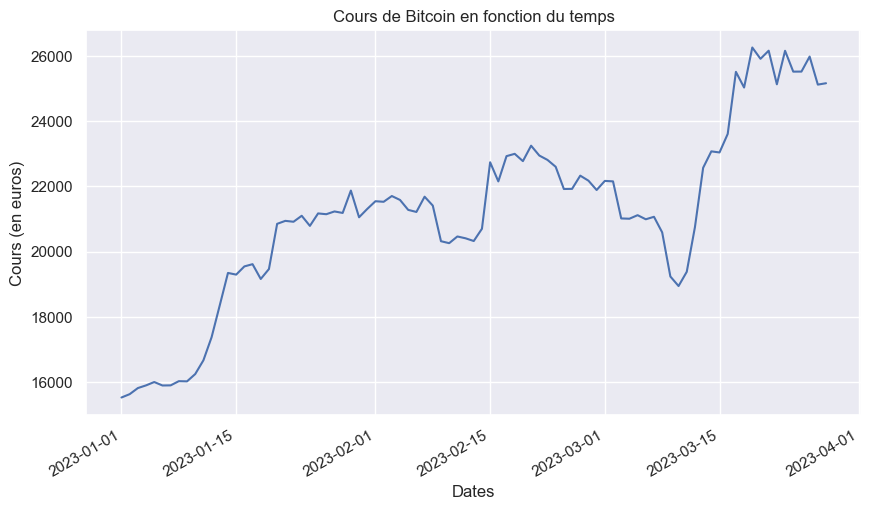

In [13]:
# Récupération et formatage des données de cours crawlées
price_data = pd.read_csv(f"rawdata/{symbole}.csv")
start_idx = np.where(price_data["time"] == date_debut)[0][0]
end_idx = np.where(price_data["time"] == date_fin)[0][0]
price_data = price_data.iloc[start_idx:(end_idx+1)]
price_data["time"] = pd.to_datetime(price_data["time"])
# Affichage de la trajectoire du cours
sns.set_theme()
plt.figure(figsize = (10, 5))
sns.lineplot(data = price_data, x = "time", y = "price")
plt.title(f"Cours de {listing.loc[np.where(listing['symbol'] == symbole)[0][0], 'name']} en fonction du temps")
plt.xlabel("Dates")
plt.ylabel("Cours (en euros)")
plt.xticks(ha = "right", rotation = 30);

### Simuler un portefeuille

Introduire la constitution initiale du portefeuille à simuler au format dictionnaire {"symbole": "montant investi en euros"}, ainsi que les dates de début et de fin de la simulation.

In [7]:
portefeuille = {
    "BTC": 12,
    "ETH": 20,
    "DOGE": 10,
    "ADA": 30,
}

date_debut = "2023-01-01" # format AAAA-MM-JJ
#date_fin = "2023-03-01" # format AAAA-MM-JJ
date_fin = str(date.today() - timedelta(days = 1)) # jusqu'à hier

In [8]:
%%capture
# Téléchargement des données de cotation
for symbole in portefeuille.keys():
    !scrapy crawl pricespider -a cid={listing.loc[np.where(listing["symbol"] == symbole)[0][0], "id"]} -a date={str(date.today())} -O rawdata/{symbole}.csv
    time.sleep(2)

# Simulation des performances du portefeuille
chemins = [f"rawdata/{symbole}.csv" for symbole in list(portefeuille.keys())]
variations = []
ptf_data = pd.DataFrame.from_dict(portefeuille, orient = "index").reset_index().rename(columns = {"index": "symbole", 0: "capital"})
ptf_data["chemin"] = chemins
for i in range(len(ptf_data)):
    price_data = pd.read_csv(ptf_data.loc[i, "chemin"])
    start_idx = np.where(price_data["time"] == date_debut)[0][0]
    end_idx = np.where(price_data["time"] == date_fin)[0][0]
    price_data = price_data.iloc[start_idx:(end_idx+1)].reset_index(drop = True)
    variations.append(ptf_data.loc[i, "capital"] * np.cumprod(np.concatenate(([1], np.array(price_data["price"])[1:]/np.array(price_data["price"])[:-1]))))
    ptf_data.loc[i, "capital"] = ptf_data.loc[i, "capital"]*(price_data.loc[len(price_data)-1, "price"]/price_data.loc[0, "price"])
ptf_data["variations"] = variations

# Récupération de l'historique du portefeuille
evo_ptf = pd.DataFrame({"time": price_data["time"], "variation": np.sum(ptf_data["variations"])})
evo_ptf["time"] = pd.to_datetime(evo_ptf["time"])

#### Résultats

Valorisation initiale du portefeuille :

In [9]:
val_init = sum(portefeuille.values())
val_fin = sum(ptf_data["capital"])
delta_tps = (datetime.strptime(date_fin, "%Y-%m-%d") - datetime.strptime(date_debut, "%Y-%m-%d")).days
print("Valorisation initiale du portefeuille :", round(val_init, 2), "€")
print("Valorisation finale du portefeuille :", round(val_fin, 2), "€")
print("Plus/moins-value réalisée :", round(val_fin - val_init, 2), "€")
print("Rendement global obtenu :", round((val_fin/val_init - 1)*100, 2), "%")
print("Rendement annualisé :", round(((val_fin/val_init)**(365/delta_tps) - 1)*100, 2), "%")

Valorisation initiale du portefeuille : 72 €
Valorisation finale du portefeuille : 102.68 €
Plus/moins-value réalisée : 30.68 €
Rendement global obtenu : 42.62 %
Rendement annualisé : 351.17 %


#### Évolution de la valeur du portefeuille

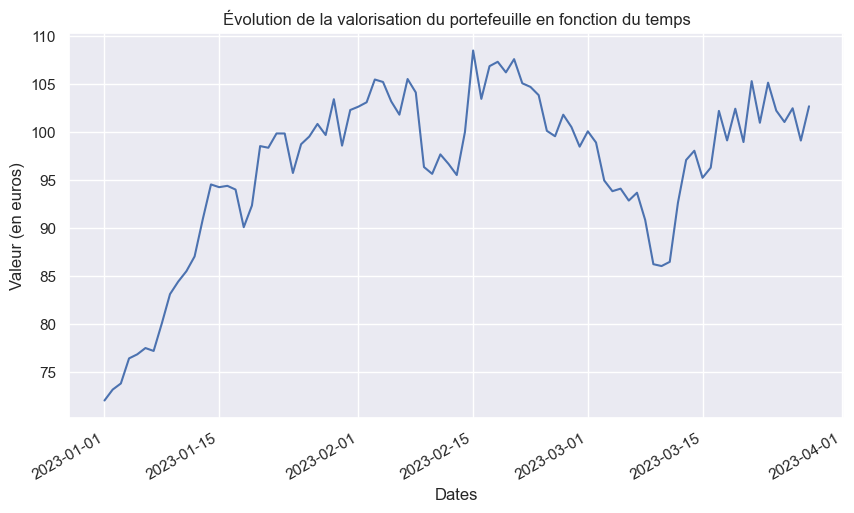

In [10]:
sns.set_theme()
plt.figure(figsize = (10, 5))
sns.lineplot(data = evo_ptf, x = "time", y = "variation")
plt.title("Évolution de la valorisation du portefeuille en fonction du temps")
plt.xlabel("Dates")
plt.ylabel("Valeur (en euros)")
plt.xticks(ha = "right", rotation = 30);